In [45]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns

#importing own scripts
import sys
import os
current_dir = os.getcwd()
sys.path.append(os.path.join(os.path.dirname(current_dir), 'scripts'))
import own_scripts

#Configure plot style
plt.style.use('ggplot')

#Configure max columns display
pd.set_option('max_columns', 200)

#reading raw data
df = pd.read_json(path_or_buf='../data/cocktail_dataset.json')

In [46]:
#we split data into two

ingredients = own_scripts.unpack_data_json(df['ingredients'])

ingredients.head(5)

,id,name,description,alcohol,type,percentage,imageUrl,createdAt,updatedAt,measure
0,170,Soda water,None,1,None,NaN,None,2024-08-18T19:01:57.000+00:00,2024-08-18T19:01:57.000+00:00,NaN
1,305,Light Rum,"Light rums, also referred to as ""silver"" or ""w...",1,Rum,NaN,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:02:37.000+00:00,2024-08-18T19:02:37.000+00:00,2-3 oz
2,312,Lime,"A lime (from French lime, from Arabic līma, fr...",0,Fruit,NaN,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:02:40.000+00:00,2024-08-18T19:02:40.000+00:00,Juice of 1
3,337,Mint,Lamiaceae (/ˌleɪmiˈeɪsiˌaɪ/ or /ˌleɪmiˈeɪsiiː/...,0,Flower,NaN,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:02:47.000+00:00,2024-08-18T19:02:47.000+00:00,2-4
4,476,Sugar,"Sugar is the generic name for sweet-tasting, s...",0,None,NaN,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:03:31.000+00:00,2024-08-18T19:03:31.000+00:00,2 tsp


In [47]:
#checking missing records
ingredients.isna().sum()

id               0
name             0
description    224
alcohol          0
type           121
percentage     431
imageUrl         1
createdAt        0
updatedAt        0
measure         35
dtype: int64

In [48]:
# locating duplicated records
ingredients.loc[ ingredients.duplicated(subset = ['name']) ].head()

,id,name,description,alcohol,type,percentage,imageUrl,createdAt,updatedAt,measure
1,476,Sugar,"Sugar is the generic name for sweet-tasting, s...",0,None,NaN,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:03:31.000+00:00,2024-08-18T19:03:31.000+00:00,1 cube
0,305,Light Rum,"Light rums, also referred to as ""silver"" or ""w...",1,Rum,NaN,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:02:37.000+00:00,2024-08-18T19:02:37.000+00:00,1/2 oz
1,2,Gin,Gin is a distilled alcoholic drink that derive...,1,Gin,40.0,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:00:44.000+00:00,2024-08-18T19:01:09.000+00:00,1 oz
1,299,lemon,"The lemon, Citrus limon (L.) Osbeck, is a spec...",0,Fruit,NaN,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:02:36.000+00:00,2024-08-18T19:02:36.000+00:00,1/2 slice
1,2,Gin,Gin is a distilled alcoholic drink that derive...,1,Gin,40.0,https://cocktails.solvro.pl/images/ingredients...,2024-08-18T19:00:44.000+00:00,2024-08-18T19:01:09.000+00:00,1 2/3 oz


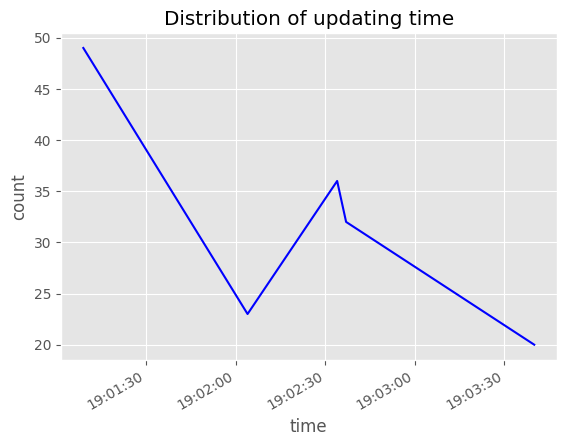

In [49]:
#checking 'updatedAt' column
clmn = ingredients['updatedAt']
clmn = pd.to_datetime(clmn)

ax = clmn.value_counts().head().plot(title='Distribution of updating time', color='blue')
ax.set_xlabel('time')
ax.set_ylabel('count')
plt.show()

# Some of the ingredients were used many times. createdAt and updatedAt columns won't be used in analysis as they don't give us any specifics of the igredients (only times when records were updated - useless metadata). The look of each ingredients won't play a big role in analysis as well. If we leave 'id' property untouched we will still be able to locate those records (if there would be a need) - so we will leave 'id' column in our dataframes.

In [50]:
ingredients = ingredients.drop(columns=['createdAt', 'updatedAt', 'imageUrl'])

# As observed before 224 of 531 descriptions are missing. Having in mind we won't analyse texts we have no use of this column.

In [51]:
ingredients = ingredients.drop(columns=['description'])

In [52]:
ingredients.head()

,id,name,alcohol,type,percentage,measure
0,170,Soda water,1,None,NaN,NaN
1,305,Light Rum,1,Rum,NaN,2-3 oz
2,312,Lime,0,Fruit,NaN,Juice of 1
3,337,Mint,0,Flower,NaN,2-4
4,476,Sugar,0,None,NaN,2 tsp


In [53]:
ingredients.isna().sum()

id              0
name            0
alcohol         0
type          121
percentage    431
measure        35
dtype: int64

In [54]:
#Correcting type of each characteristic: NaN -> 0

for header in ['percentage', 'measure', 'type']:
    ingredients[header] = ingredients[header].apply(lambda a: 0 if pd.isna(a) else a)

ingredients.head()

,id,name,alcohol,type,percentage,measure
0,170,Soda water,1,0,0.0,0
1,305,Light Rum,1,Rum,0.0,2-3 oz
2,312,Lime,0,Fruit,0.0,Juice of 1
3,337,Mint,0,Flower,0.0,2-4
4,476,Sugar,0,0,0.0,2 tsp


# Our dataframe have only most important properties of records left. We could map 'alcohol' column to represent this property as 'True' and 'False' but we will leave it as it is for now.

# Now we will explore properties of this subset

In [55]:
ingredients['type'].value_counts().head()

0          121
Liqueur     54
Fruit       49
Gin         45
Juice       40
Name: type, dtype: int64

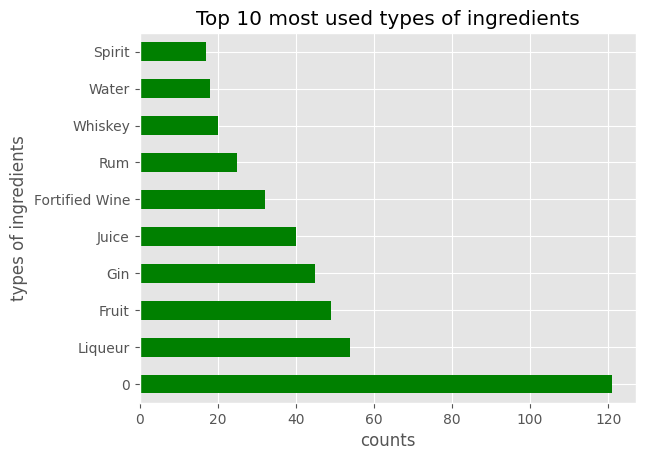

In [56]:
ax = ingredients['type'].value_counts().head(10).plot(kind='barh', title='Top 10 most used types of ingredients', color='green')

ax.set_xlabel('counts')
ax.set_ylabel('types of ingredients')
plt.show()

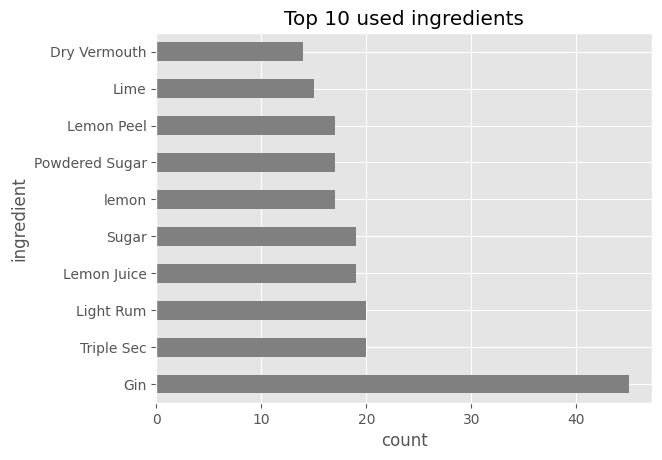

In [57]:
ax = ingredients['name'].value_counts().head(10).plot(kind='barh', color='grey', title='Top 10 used ingredients')

ax.set_xlabel('count')
ax.set_ylabel('ingredient')
plt.show()

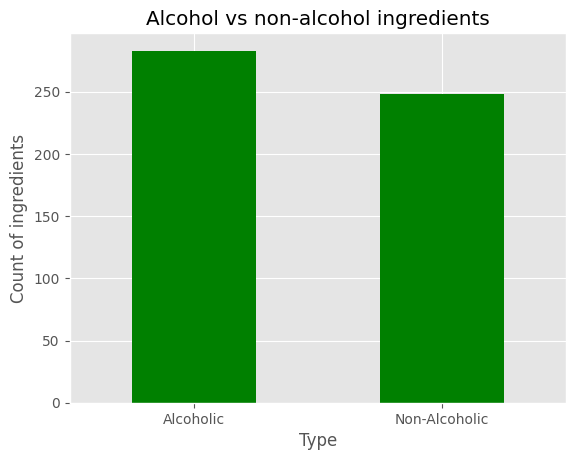

In [58]:
ax = ingredients['alcohol'].value_counts().head(10).plot(kind='bar', color='green', title='Alcohol vs non-alcohol ingredients')

ax.set_ylabel('Count of ingredients')
ax.set_xlabel('Type')
ax.set_xticks([0, 1])
#displaying xticks horizontally
ax.set_xticklabels(['Alcoholic', 'Non-Alcoholic'], rotation=0)

plt.show()

# Feature relationship
note: 'measure' is not normalized and seems not to be easy to do it - we get rid of it :)
(since we have only one numeric characteristic it is not possible to test correlations)

In [59]:
ingredients = ingredients.drop(columns=['measure'])
ingredients.head()

,id,name,alcohol,type,percentage
0,170,Soda water,1,0,0.0
1,305,Light Rum,1,Rum,0.0
2,312,Lime,0,Fruit,0.0
3,337,Mint,0,Flower,0.0
4,476,Sugar,0,0,0.0


$\textcolor{lightgreen}{\text{Q: What's the average percentage?}}$

In [67]:
print('Average percentage per ingredient is: ', ingredients['percentage'].mean().round(2))

Average percentage per ingredient is:  6.79
